<a href="https://colab.research.google.com/github/Aryamaan777/Cats-vs-Dogs-Classifier/blob/master/CatsvDogs2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -q kaggle
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6
!kaggle -v

Found existing installation: kaggle 1.5.6
Uninstalling kaggle-1.5.6:
  Successfully uninstalled kaggle-1.5.6
Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.0.2)
Processing /root/.cache/pip/wheels/01/3e/ff/77407ebac3ef71a79b9166a8382aecf88415a0bcbe3c095a01/kaggle-1.5.6-py3-none-any.whl
Kaggle API 1.5.6


In [4]:
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [265]:
!kaggle datasets download -d chetankv/dogs-cats-images

dogs-cats-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [266]:
!mkdir train
!unzip dogs-cats-images.zip

mkdir: cannot create directory ‘train’: File exists
Archive:  dogs-cats-images.zip
replace dataset/test_set/cats/cat.4001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace dataset/test_set/cats/cat.4002.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace dataset/test_set/cats/cat.4003.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc3


In [0]:
import pandas as pd
import numpy as np
import cv2
import glob
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input,Dense,Conv2D,Dropout,Flatten,BatchNormalization,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
x=[]
y=[]

#CAT=0 DOG=1
dogst=glob.glob("/content/dog vs cat/dataset/training_set/dogs/dog.*.jpg")
for dog in dogst:
  img=cv2.imread(dog)
  img=cv2.resize(img,(160,160)).flatten()
  img=np.array(img).reshape(160,160,3)
  x.append([img,1])

print(len(x))

4000


In [224]:
print(x[0])

[array([ 14,  21,  30, ...,  27,  14, 240], dtype=uint8), 1]


In [4]:
#CAT=0 DOG=1
catst=glob.glob("/content/dog vs cat/dataset/training_set/cats/cat.*.jpg")
for cat in catst:
  img=cv2.imread(cat)
  img=cv2.resize(img,(160,160)).flatten()
  img=np.array(img).reshape(160,160,3)
  x.append([img,0])

print(len(x))

8000


In [0]:
train=pd.DataFrame(x,columns=["image","class"])

In [0]:
x=np.array(x)

In [0]:
z=[]
for i in range(len(x)):
  z.append(x[i][0])

In [8]:
z=np.array(z)
print(z.shape)

(8000, 160, 160, 3)


In [228]:
train.head()

,image,class
0,"[14, 21, 30, 12, 21, 30, 11, 22, 30, 8, 23, 29...",1
1,"[8, 10, 21, 6, 10, 21, 5, 10, 21, 6, 10, 21, 5...",1
2,"[86, 80, 81, 87, 81, 82, 88, 82, 83, 89, 83, 8...",1
3,"[74, 78, 83, 82, 88, 93, 92, 102, 106, 144, 15...",1
4,"[197, 164, 185, 205, 168, 188, 197, 154, 175, ...",1


In [0]:
from PIL import Image
import matplotlib.pyplot as plt

In [0]:
trainclass=np.array(train["class"])

8000


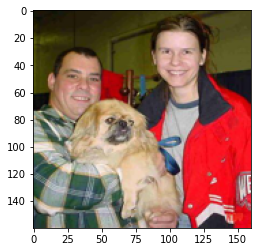

In [135]:
img=(train["image"].iloc[0:3])
plt.imshow(img[0])
print(len(train["image"]))

In [0]:
x_train,x_val,y_train,y_val=train_test_split(z,trainclass,test_size=0.2)

In [0]:
y_train,y_val=y_train.flatten(),y_val.flatten()

In [21]:
print(x_train[0].shape)

(160, 160, 3)


In [0]:
i=Input(shape=(160,160,3))
x=Conv2D(32,(3,3),strides=2,activation="relu")(i)
x=BatchNormalization()(x)
x=Conv2D(64,(3,3),strides=2,activation="relu")(x)
x=BatchNormalization()(x)

x=Conv2D(64,(3,3),strides=2,activation="relu")(x)
x=BatchNormalization()(x)
x=Conv2D(128,(3,3),strides=2,activation="relu")(x)
x=BatchNormalization()(x)


x=Conv2D(128,(3,3),strides=2,activation="relu")(x)
x=BatchNormalization()(x)
x=Conv2D(128,(3,3),strides=2,activation="relu")(x)
x=BatchNormalization()(x)


x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(512,activation="relu")(x)
x=Dropout(0.2)(x)
x=Dense(1024,activation="relu")(x)
x=Dense(1,activation="sigmoid")(x)

#32,64,64,128,128,128 and both dropouts-74%

model=Model(i,x)

In [0]:
opt=Adam(lr=0.0001)

Epoch 1/15
200/200 [==============================] - 3s 13ms/step - loss: 0.6747 - accuracy: 0.6064 - val_loss: 0.6672 - val_accuracy: 0.6194
Epoch 2/15
200/200 [==============================] - 2s 11ms/step - loss: 0.6034 - accuracy: 0.6733 - val_loss: 0.6287 - val_accuracy: 0.6506
Epoch 3/15
200/200 [==============================] - 2s 11ms/step - loss: 0.5578 - accuracy: 0.7139 - val_loss: 0.6130 - val_accuracy: 0.6481
Epoch 4/15
200/200 [==============================] - 2s 11ms/step - loss: 0.5116 - accuracy: 0.7527 - val_loss: 0.7732 - val_accuracy: 0.6388
Epoch 5/15
200/200 [==============================] - 2s 11ms/step - loss: 0.4598 - accuracy: 0.7877 - val_loss: 0.6377 - val_accuracy: 0.6925
Epoch 6/15
200/200 [==============================] - 2s 11ms/step - loss: 0.3871 - accuracy: 0.8227 - val_loss: 0.8693 - val_accuracy: 0.6325
Epoch 7/15
200/200 [==============================] - 2s 11ms/step - loss: 0.3088 - accuracy: 0.8659 - val_loss: 0.6888 - val_accuracy: 0.6819

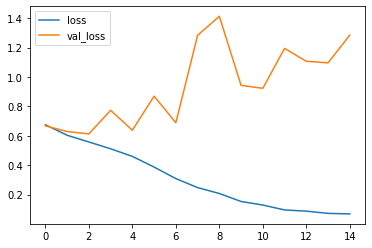

In [14]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

r=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=15)

plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="val_loss")
plt.legend()

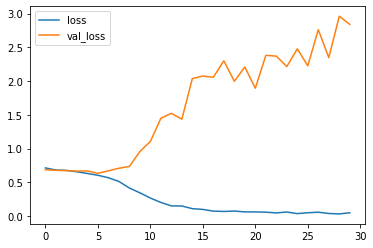

In [126]:
plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="val_loss")
plt.legend()

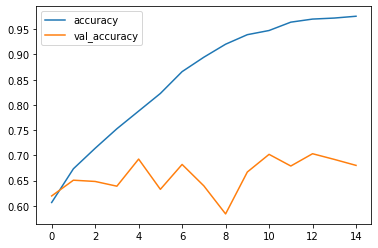

In [15]:
plt.plot(r.history["accuracy"],label="accuracy")
plt.plot(r.history["val_accuracy"],label="val_accuracy")
plt.legend()

In [16]:
x1=[]
y1=[]

#CAT=0 DOG=1
dogst=glob.glob("/content/dog vs cat/dataset/test_set/dogs/dog.*.jpg")
for dog in dogst:
  img=cv2.imread(dog)
  img=cv2.resize(img,(160,160)).flatten()
  img=np.array(img).reshape(160,160,3)
  x1.append([img,1])

#CAT=0 DOG=1
catst=glob.glob("/content/dog vs cat/dataset/test_set/cats/cat.*.jpg")
for cat in catst:
  img=cv2.imread(cat)
  img=cv2.resize(img,(160,160)).flatten()
  img=np.array(img).reshape(160,160,3)
  x1.append([img,0])

print(len(x1))

2000


In [0]:
test=pd.DataFrame(x1,columns=["image","class"])
x1=np.array(x1)
z1=[]
for i in range(len(x1)):
  z1.append(x1[i][0])
z1=np.array(z1)

In [19]:
print(z1.shape)

(2000, 160, 160, 3)


In [0]:
testclass=np.array(test["class"])

In [0]:
pred=model.predict(z1)
classes=np.argmax(pred,axis=1)

In [19]:
print(model.evaluate(x_train,y_train))

200/200 [==============================] - 1s 4ms/step - loss: 0.0845 - accuracy: 0.9688
[0.08446383476257324, 0.96875]


In [32]:
print(model.evaluate(z1,testclass))

63/63 [==============================] - 0s 5ms/step - loss: 0.3390 - accuracy: 0.8515
[0.3389549255371094, 0.8514999747276306]


In [0]:
classesx=np.argmax(predx,axis=0)

In [107]:
print(collections.Counter(classesx))

Counter({0: 1})


In [113]:
import collections
print(collections.Counter(classes))

Counter({0: 2000})


In [0]:
datagen=ImageDataGenerator(rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.1)

datagen.fit(x_train)

In [29]:
r=model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32, validation_data=(x_val,y_val),epochs=20)

Epoch 1/20
200/200 [==============================] - 38s 192ms/step - loss: 0.3807 - accuracy: 0.8333 - val_loss: 0.7147 - val_accuracy: 0.7525
Epoch 2/20
200/200 [==============================] - 38s 191ms/step - loss: 0.3804 - accuracy: 0.8305 - val_loss: 0.6491 - val_accuracy: 0.7525
Epoch 3/20
200/200 [==============================] - 38s 190ms/step - loss: 0.3768 - accuracy: 0.8325 - val_loss: 0.5120 - val_accuracy: 0.7644
Epoch 4/20
200/200 [==============================] - 38s 190ms/step - loss: 0.3716 - accuracy: 0.8303 - val_loss: 0.4233 - val_accuracy: 0.7987
Epoch 5/20
200/200 [==============================] - 38s 189ms/step - loss: 0.3791 - accuracy: 0.8317 - val_loss: 0.3724 - val_accuracy: 0.8331
Epoch 6/20
200/200 [==============================] - 38s 190ms/step - loss: 0.3689 - accuracy: 0.8356 - val_loss: 0.4123 - val_accuracy: 0.8144
Epoch 7/20
200/200 [==============================] - 38s 190ms/step - loss: 0.3693 - accuracy: 0.8395 - val_loss: 0.4589 - val_ac

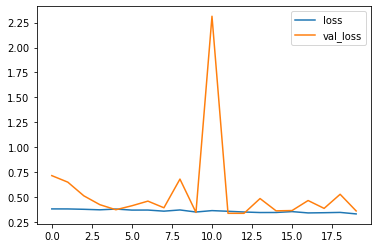

In [30]:
plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="val_loss")
plt.legend()

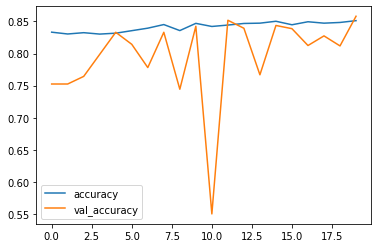

In [31]:
plt.plot(r.history["accuracy"],label="accuracy")
plt.plot(r.history["val_accuracy"],label="val_accuracy")
plt.legend()